In [382]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [337]:
Habitable=pd.read_csv('data.csv')
Habitable.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
100,Kepler-1544 b,Kepler-1544,0,1,1,Transit,2016,Kepler,Kepler Project Candidate (q1_q17_dr25_koi),0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,168.811330,0.002102,-0.002102,0.0,0.54590,NaN,NaN,0.0,1.69,0.10,-0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,0.80,0.17,-0.12,0.0,241.0,NaN,NaN,0.0,0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,NaN,4798.0,95.0,-95.0,0.0,0.71,0.04,-0.03,0.0,0.77,0.03,-0.05,0.0,0.00,0.15,-0.15,0.0,[Fe/H],4.62,0.01,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h49m08.45s,297.285217,+49d12m44.83s,49.212453,335.0900,1.6660,-1.6500,14.287,0.114,-0.114,11.903,0.018,-0.018,14.0390,0.000333,-0.000333,2017-05-08 00:00:00,2017-08-31 00:00:00,2017-05-08 00:00:00
74,Kepler-62 e,Kepler-62,0,1,5,Transit,2013,Kepler,Kepler Project Candidate (q1_q17_dr25_koi),0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,122.385868,0.000502,-0.000502,0.0,0.43240,NaN,NaN,0.0,1.72,0.10,-0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,1.24,0.27,-0.19,0.0,269.0,NaN,NaN,0.0,0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,NaN,4926.0,98.0,-98.0,0.0,0.66,0.04,-0.03,0.0,0.73,0.03,-0.06,0.0,-0.36,0.15,-0.15,0.0,[Fe/H],4.65,0.02,-0.05,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,18h52m51.01s,283.212562,+45d20m58.92s,45.349699,300.8740,1.2190,-1.2190,13.965,0.092,-0.092,11.659,0.021,-0.021,13.7197,0.000208,-0.000208,2017-05-08 00:00:00,2017-08-31 00:00:00,2017-05-08 00:00:00
142,GJ 3293 d,GJ 3293,1,1,4,Radial Velocity,2017,La Silla Observatory,Published Confirmed,0,<a refstr=ASTUDILLO_DEFRU_ET_AL__2017 href=htt...,48.134500,0.062800,-0.066100,0.0,0.19394,0.00017,-0.00018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,1.05,-1.05,0.0,0.02391,0.0033,-0.0033,0.0,Msini,0.12,0.13,-0.09,0.0,0.59,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,<a refstr=ASTUDILLO_DEFRU_ET_AL__2017 href=htt...,M2.5,3466.0,49.0,-49.0,0.0,0.40,0.03,-0.03,0.0,0.42,NaN,NaN,0.0,0.02,0.09,-0.09,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,04h28m35.63s,67.148443,-25d10m16.82s,-25.171340,20.1903,0.0216,-0.0216,11.945,0.037,-0.037,7.486,0.033,-0.033,10.9788,0.000878,-0.000878,2017-03-29 00:00:00,2017-06,2017-03-30 00:00:00
97,Kepler-1544 b,Kepler-1544,0,1,1,Transit,2016,Kepler,Kepler Project Candidate (q1_q16_koi),0,<a refstr=Q1_Q16_KOI_TABLE href=https://exopla...,168.811174,0.001271,-0.001271,0.0,0.54000,NaN,NaN,0.0,1.83,4.73,-0.17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,1.02,13.70,-0.25,0.0,256.0,NaN,NaN,0.0,0,<a refstr=Q1_Q16_KOI_TABLE href=https://exopla...,NaN,4893.0,141.0,-110.0,0.0,0.76,1.97,-0.07,0.0,0.73,0.28,-0.06,0.0,-0.04,0.28,-0.24,0.0,[Fe/H],4.54,0.06,-0.98,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h49m08.45s,297.285217,+49d12m44.83s,49.212453,335.0900,1.6660,-1.6500,14.287,0.114,-0.114,11.903,0.018,-0.018,14.0390,0.000333,-0.000333,2014-11-21 00:00:00,2014-12-18 00:00:00,2014-11-21 00:00:00
78,Kepl

In [338]:
InHabitable=pd.read_excel('Inhabitable Exoplanet.xlsx')
InHabitable.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
991,HAT-P-26 b,HAT-P-26,1,1,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,4.234520,1.500000e-05,-1.500000e-05,0.0,NaN,NaN,NaN,NaN,7.062,0.448,-0.448,0.0,0.63,0.04,-0.04,0.0,22.2481,6.3566,-6.3566,0.0,0.07000,0.0200,-0.0200,0.0,Mass,0.120,0.06,-0.06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,5079.0,88.0,-88.0,0.0,0.87,0.05,-0.05,0.0,1.12,0.36,-0.36,0.0,-0.04,NaN,NaN,0.0,[Fe/H],4.56,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,14h12m37.57s,213.156551,+04d03m33.90s,4.059418,141.8370,1.1520,-1.1330,11.757,0.025,-0.025,9.581,0.023,-0.023,11.4641,0.000553,-0.000553,2018-04-25,2017-03,2018-04-26
575,GJ 3293 d,GJ 3293,1,1,4,Radial Velocity,2017,La Silla Observatory,Published Confirmed,0,<a refstr=ASTUDILLO_DEFRU_ET_AL__2017 href=htt...,48.134500,6.280000e-02,-6.610000e-02,0.0,0.19394,0.00017,-0.00018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6000,1.0500,-1.0500,0.0,0.02391,0.0033,-0.0033,0.0,Msini,0.120,0.13,-0.09,0.0,0.59,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,<a refstr=ASTUDILLO_DEFRU_ET_AL__2017 href=htt...,M2.5,3466.0,49.0,-49.0,0.0,0.40,0.03,-0.03,0.0,0.42,NaN,NaN,0.0,0.02,0.09,-0.09,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,04h28m35.63s,67.148443,-25d10m16.82s,-25.171340,20.1903,0.0216,-0.0216,11.945,0.037,-0.037,7.486,0.033,-0.033,10.9788,0.000878,-0.000878,2017-03-29,2017-06,2017-03-30
1396,HATS-31 b,HATS-31,1,1,1,Transit,2016,HATSouth,Published Confirmed,0,<a refstr=DE_VAL_BORRO_ET_AL__2016 href=https:...,3.377960,1.200000e-05,-1.200000e-05,0.0,0.04780,0.00120,-0.00120,0.0,18.383,2.466,-2.466,0.0,1.64,0.22,-0.22,0.0,279.6904,38.1396,-38.1396,0.0,0.88000,0.1200,-0.1200,0.0,Mass,0.233,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1823.0,81.0,-81.0,0.0,0,<a refstr=DE_VAL_BORRO_ET_AL__2016 href=https:...,NaN,6050.0,120.0,-120.0,0.0,1.87,0.18,-0.18,0.0,1.27,0.10,-0.10,0.0,0.00,0.07,-0.07,0.0,[Fe/H],4.00,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h46m48.68s,191.702821,-24d25m38.60s,-24.427390,773.9740,20.3170,-19.3210,13.315,0.092,-0.092,11.572,0.023,-0.023,12.9613,0.000394,-0.000394,2016-11-30,2016-12,2016-12-01
1054,HAT-P-32 b,HAT-P-32,0,2,1,Transit,2011,HATNet,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,2.150008,1.400000e-07,-1.400000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,02h04m10.26s,31.042761,+46d41m16.26s,46.687851,289.2050,5.3550,-5.1670,11.439,0.015,-0.015,9.990,0.022,-0.022,11.1335,0.000479,-0.000479,2022-10-18,2022-04,2022-10-18
221,CoRoT-1 b,CoRoT-1,0,1,1,Transit,2008,CoRoT,Published Confirmed,0,<a refstr=TURNER_ET_AL__2016 href=https://ui.a...,1.508977,1.000000e-07,-1.000000e-07,0.0,0.02590,0.00110,-0.0

In [339]:
InHabitable.shape

(1403, 92)

In [340]:
Habitable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          237 non-null    object 
 1   hostname         237 non-null    object 
 2   default_flag     237 non-null    int64  
 3   sy_snum          237 non-null    int64  
 4   sy_pnum          237 non-null    int64  
 5   discoverymethod  237 non-null    object 
 6   disc_year        237 non-null    int64  
 7   disc_facility    237 non-null    object 
 8   soltype          237 non-null    object 
 9   pl_controv_flag  237 non-null    int64  
 10  pl_refname       237 non-null    object 
 11  pl_orbper        220 non-null    float64
 12  pl_orbpererr1    217 non-null    float64
 13  pl_orbpererr2    217 non-null    float64
 14  pl_orbperlim     220 non-null    float64
 15  pl_orbsmax       150 non-null    float64
 16  pl_orbsmaxerr1   69 non-null     float64
 17  pl_orbsmaxerr2  

In [341]:
string='''# COLUMN pl_name:        Planet Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN hostname:       Host Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN default_flag:   Default Parameter Set,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_snum:        Number of Stars,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_pnum:        Number of Planets,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN discoverymethod: Discovery Method,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN disc_year:      Discovery Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN disc_facility:  Discovery Facility,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN soltype:        Solution Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_controv_flag: Controversial Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_refname:     Planetary Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbper:      Orbital Period [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbperlim:   Orbital Period Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au]),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_rade:        Planet Radius [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radelim:     Planet Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radj:        Planet Radius [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjerr1:    Planet Radius Upper Unc. [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjerr2:    Planet Radius Lower Unc. [Jupiter Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_radjlim:     Planet Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasseerr1:  Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasseerr2:  Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjerr1:  Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjerr2:  Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccen:    Eccentricity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenerr1: Eccentricity Upper Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenerr2: Eccentricity Lower Unc.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_orbeccenlim: Eccentricity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insol:       Insolation Flux [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insolerr1:   Insolation Flux Upper Unc. [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insolerr2:   Insolation Flux Lower Unc. [Earth Flux],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_insollim:    Insolation Flux Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqt:         Equilibrium Temperature [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqterr1:     Equilibrium Temperature Upper Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqterr2:     Equilibrium Temperature Lower Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_eqtlim:      Equilibrium Temperature Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN ttv_flag:       Data show Transit Timing Variations,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_refname:     Stellar Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_spectype:    Spectral Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_teff:        Stellar Effective Temperature [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefferr1:    Stellar Effective Temperature Upper Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefferr2:    Stellar Effective Temperature Lower Unc. [K],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_tefflim:     Stellar Effective Temperature Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_rad:         Stellar Radius [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_raderr1:     Stellar Radius Upper Unc. [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_raderr2:     Stellar Radius Lower Unc. [Solar Radius],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_radlim:      Stellar Radius Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_mass:        Stellar Mass [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masserr1:    Stellar Mass Upper Unc. [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masserr2:    Stellar Mass Lower Unc. [Solar mass],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_masslim:     Stellar Mass Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_met:         Stellar Metallicity [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_meterr1:     Stellar Metallicity Upper Unc. [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_meterr2:     Stellar Metallicity Lower Unc. [dex],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_metlim:      Stellar Metallicity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_metratio:    Stellar Metallicity Ratio,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_loggerr1:    Stellar Surface Gravity Upper Unc. [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_loggerr2:    Stellar Surface Gravity Lower Unc. [log10(cm/s**2)],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN st_logglim:     Stellar Surface Gravity Limit Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_refname:     System Parameter Reference,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN rastr:          RA [sexagesimal],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN ra:             RA [deg],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN decstr:         Dec [sexagesimal],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN dec:            Dec [deg],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_dist:        Distance [pc],,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_disterr1:    Distance [pc] Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_disterr2:    Distance [pc] Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmag:        V (Johnson) Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmagerr1:    V (Johnson) Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_vmagerr2:    V (Johnson) Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmag:        Ks (2MASS) Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamag:     Gaia Magnitude,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamagerr1: Gaia Magnitude Upper Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN sy_gaiamagerr2: Gaia Magnitude Lower Unc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN rowupdate:      Date of Last Update,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN pl_pubdate:     Planetary Parameter Reference Publication Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
# COLUMN releasedate:    Release Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'''
string=string.replace(',','')
string 

'# COLUMN pl_name:        Planet Name\n# COLUMN hostname:       Host Name\n# COLUMN default_flag:   Default Parameter Set\n# COLUMN sy_snum:        Number of Stars\n# COLUMN sy_pnum:        Number of Planets\n# COLUMN discoverymethod: Discovery Method\n# COLUMN disc_year:      Discovery Year\n# COLUMN disc_facility:  Discovery Facility\n# COLUMN soltype:        Solution Type\n# COLUMN pl_controv_flag: Controversial Flag\n# COLUMN pl_refname:     Planetary Parameter Reference\n# COLUMN pl_orbper:      Orbital Period [days]\n# COLUMN pl_orbpererr1:  Orbital Period Upper Unc. [days]\n# COLUMN pl_orbpererr2:  Orbital Period Lower Unc. [days]\n# COLUMN pl_orbperlim:   Orbital Period Limit Flag\n# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])\n# COLUMN pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n# COLUMN pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n# COLUMN pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n# COLUMN pl_rade:        Planet Radius [Earth Radius]\n# COL

In [342]:
string=string.replace('# COLUMN','')
string

' pl_name:        Planet Name\n hostname:       Host Name\n default_flag:   Default Parameter Set\n sy_snum:        Number of Stars\n sy_pnum:        Number of Planets\n discoverymethod: Discovery Method\n disc_year:      Discovery Year\n disc_facility:  Discovery Facility\n soltype:        Solution Type\n pl_controv_flag: Controversial Flag\n pl_refname:     Planetary Parameter Reference\n pl_orbper:      Orbital Period [days]\n pl_orbpererr1:  Orbital Period Upper Unc. [days]\n pl_orbpererr2:  Orbital Period Lower Unc. [days]\n pl_orbperlim:   Orbital Period Limit Flag\n pl_orbsmax:     Orbit Semi-Major Axis [au])\n pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n pl_rade:        Planet Radius [Earth Radius]\n pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]\n pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]\n pl_radelim:     Planet Radius Limit Flag\n pl_ra

In [343]:
print(' pl_name:        Planet Name\n hostname:       Host Name\n default_flag:   Default Parameter Set\n sy_snum:        Number of Stars\n sy_pnum:        Number of Planets\n discoverymethod: Discovery Method\n disc_year:      Discovery Year\n disc_facility:  Discovery Facility\n soltype:        Solution Type\n pl_controv_flag: Controversial Flag\n pl_refname:     Planetary Parameter Reference\n pl_orbper:      Orbital Period [days]\n pl_orbpererr1:  Orbital Period Upper Unc. [days]\n pl_orbpererr2:  Orbital Period Lower Unc. [days]\n pl_orbperlim:   Orbital Period Limit Flag\n pl_orbsmax:     Orbit Semi-Major Axis [au])\n pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]\n pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]\n pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag\n pl_rade:        Planet Radius [Earth Radius]\n pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]\n pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]\n pl_radelim:     Planet Radius Limit Flag\n pl_radj:        Planet Radius [Jupiter Radius]\n pl_radjerr1:    Planet Radius Upper Unc. [Jupiter Radius]\n pl_radjerr2:    Planet Radius Lower Unc. [Jupiter Radius]\n pl_radjlim:     Planet Radius Limit Flag\n pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]\n pl_bmasseerr1:  Planet Mass or Mass*sin(i) [Earth Mass] Upper Unc.\n pl_bmasseerr2:  Planet Mass or Mass*sin(i) [Earth Mass] Lower Unc.\n pl_bmasselim:   Planet Mass or Mass*sin(i) [Earth Mass] Limit Flag\n pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]\n pl_bmassjerr1:  Planet Mass or Mass*sin(i) [Jupiter Mass] Upper Unc.\n pl_bmassjerr2:  Planet Mass or Mass*sin(i) [Jupiter Mass] Lower Unc.\n pl_bmassjlim:   Planet Mass or Mass*sin(i) [Jupiter Mass] Limit Flag\n pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance\n pl_orbeccen:    Eccentricity\n pl_orbeccenerr1: Eccentricity Upper Unc.\n pl_orbeccenerr2: Eccentricity Lower Unc.\n pl_orbeccenlim: Eccentricity Limit Flag\n pl_insol:       Insolation Flux [Earth Flux]\n pl_insolerr1:   Insolation Flux Upper Unc. [Earth Flux]\n pl_insolerr2:   Insolation Flux Lower Unc. [Earth Flux]\n pl_insollim:    Insolation Flux Limit Flag\n pl_eqt:         Equilibrium Temperature [K]\n pl_eqterr1:     Equilibrium Temperature Upper Unc. [K]\n pl_eqterr2:     Equilibrium Temperature Lower Unc. [K]\n pl_eqtlim:      Equilibrium Temperature Limit Flag\n ttv_flag:       Data show Transit Timing Variations\n st_refname:     Stellar Parameter Reference\n st_spectype:    Spectral Type\n st_teff:        Stellar Effective Temperature [K]\n st_tefferr1:    Stellar Effective Temperature Upper Unc. [K]\n st_tefferr2:    Stellar Effective Temperature Lower Unc. [K]\n st_tefflim:     Stellar Effective Temperature Limit Flag\n st_rad:         Stellar Radius [Solar Radius]\n st_raderr1:     Stellar Radius Upper Unc. [Solar Radius]\n st_raderr2:     Stellar Radius Lower Unc. [Solar Radius]\n st_radlim:      Stellar Radius Limit Flag\n st_mass:        Stellar Mass [Solar mass]\n st_masserr1:    Stellar Mass Upper Unc. [Solar mass]\n st_masserr2:    Stellar Mass Lower Unc. [Solar mass]\n st_masslim:     Stellar Mass Limit Flag\n st_met:         Stellar Metallicity [dex]\n st_meterr1:     Stellar Metallicity Upper Unc. [dex]\n st_meterr2:     Stellar Metallicity Lower Unc. [dex]\n st_metlim:      Stellar Metallicity Limit Flag\n st_metratio:    Stellar Metallicity Ratio\n st_logg:        Stellar Surface Gravity [log10(cm/s**2)]\n st_loggerr1:    Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]\n st_loggerr2:    Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]\n st_logglim:     Stellar Surface Gravity Limit Flag\n sy_refname:     System Parameter Reference\n rastr:          RA [sexagesimal]\n ra:             RA [deg]\n decstr:         Dec [sexagesimal]\n dec:            Dec [deg]\n sy_dist:        Distance [pc]\n sy_disterr1:    Distance [pc] Upper Unc\n sy_disterr2:    Distance [pc] Lower Unc\n sy_vmag:        V (Johnson) Magnitude\n sy_vmagerr1:    V (Johnson) Magnitude Upper Unc\n sy_vmagerr2:    V (Johnson) Magnitude Lower Unc\n sy_kmag:        Ks (2MASS) Magnitude\n sy_kmagerr1:    Ks (2MASS) Magnitude Upper Unc\n sy_kmagerr2:    Ks (2MASS) Magnitude Lower Unc\n sy_gaiamag:     Gaia Magnitude\n sy_gaiamagerr1: Gaia Magnitude Upper Unc\n sy_gaiamagerr2: Gaia Magnitude Lower Unc\n rowupdate:      Date of Last Update\n pl_pubdate:     Planetary Parameter Reference Publication Date\n releasedate:    Release Date\n#')

 pl_name:        Planet Name
 hostname:       Host Name
 default_flag:   Default Parameter Set
 sy_snum:        Number of Stars
 sy_pnum:        Number of Planets
 discoverymethod: Discovery Method
 disc_year:      Discovery Year
 disc_facility:  Discovery Facility
 soltype:        Solution Type
 pl_controv_flag: Controversial Flag
 pl_refname:     Planetary Parameter Reference
 pl_orbper:      Orbital Period [days]
 pl_orbpererr1:  Orbital Period Upper Unc. [days]
 pl_orbpererr2:  Orbital Period Lower Unc. [days]
 pl_orbperlim:   Orbital Period Limit Flag
 pl_orbsmax:     Orbit Semi-Major Axis [au])
 pl_orbsmaxerr1: Orbit Semi-Major Axis Upper Unc. [au]
 pl_orbsmaxerr2: Orbit Semi-Major Axis Lower Unc. [au]
 pl_orbsmaxlim:  Orbit Semi-Major Axis Limit Flag
 pl_rade:        Planet Radius [Earth Radius]
 pl_radeerr1:    Planet Radius Upper Unc. [Earth Radius]
 pl_radeerr2:    Planet Radius Lower Unc. [Earth Radius]
 pl_radelim:     Planet Radius Limit Flag
 pl_radj:        Planet Radius

In [344]:
Habitable.sample(5)


,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
58,Kepler-186 f,Kepler-186,0,1,5,Transit,2014,Kepler,Kepler Project Candidate (q1_q17_dr25_koi),1,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,129.945392,0.001556,-0.001556,0.0,0.38550,NaN,NaN,0.0,1.18,0.11,-0.14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,0.23,0.07,-0.06,0.0,177.0,NaN,NaN,0.0,0,<a refstr=Q1_Q17_DR25_KOI_TABLE href=https://e...,NaN,3751.0,75.0,-84.0,0.0,0.44,0.04,-0.05,0.0,0.45,0.04,-0.05,0.0,-0.34,0.15,-0.15,0.0,[Fe/H],4.80,0.07,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h54m36.66s,298.652736,+43d57m17.96s,43.954988,177.5940,0.7740,-0.7740,15.138,0.080,-0.080,11.605,0.018,-0.018,14.5994,0.000356,-0.000356,2017-05-08 00:00:00,2017-08-31 00:00:00,2017-05-08 00:00:00
136,Kepler-440 b,Kepler-440,1,1,1,Transit,2015,Kepler,Published Confirmed,0,<a refstr=TORRES_ET_AL__2015 href=https://ui.a...,101.111410,0.000870,-0.000680,0.0,0.24200,0.06600,-0.04100,0.0,1.86,0.24,-0.19,0.0,0.17,0.02,-0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.34,0.12,-0.19,-1.0,1.20,0.46,-0.65,0.0,NaN,NaN,NaN,NaN,0,<a refstr=TORRES_ET_AL__2015 href=https://ui.a...,NaN,4134.0,154.0,-154.0,0.0,0.56,0.03,-0.05,0.0,0.57,0.04,-0.05,0.0,-0.30,0.15,-0.15,0.0,[Fe/H],4.71,0.05,-0.02,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h01m24.02s,285.350066,+41d27m08.53s,41.452370,301.0300,2.2780,-2.2780,15.637,0.172,-0.172,12.121,0.021,-0.021,15.1058,0.000380,-0.000380,2015-01-06 00:00:00,2015-02,2015-01-06 00:00:00
55,Kepler-186 f,Kepler-186,0,1,5,Transit,2014,Kepler,Published Confirmed,1,<a refstr=GAJDO_SCARON__ET_AL__2019 href=https...,129.942511,0.000513,-0.000513,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,3876.0,157.0,-157.0,0.0,0.55,0.02,-0.02,0.0,0.54,0.02,-0.02,0.0,NaN,NaN,NaN,NaN,NaN,4.70,0.01,-0.01,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h54m36.66s,298.652736,+43d57m17.96s,43.954988,177.5940,0.7740,-0.7740,15.138,0.080,-0.080,11.605,0.018,-0.018,14.5994,0.000356,-0.000356,2019-04-16 00:00:00,2019-03,2019-04-18 00:00:00
130,Kepler-440 b,Kepler-440,0,1,1,Transit,2015,Kepler,Kepler Project Candidate (q1_q12_koi),0,<a refstr=Q1_Q12_KOI_TABLE href=https://exopla...,101.111498,0.000889,-0.000889,0.0,0.33400,NaN,NaN,0.0,1.47,0.19,-0.18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.0,0.39,0.13,-0.12,0.0,201.0,NaN,NaN,0.0,0,<a refstr=Q1_Q12_KOI_TABLE href=https://exopla...,NaN,3813.0,58.0,-87.0,0.0,0.48,0.06,-0.06,0.0,0.48,0.05,-0.07,0.0,-0.30,0.10,-0.20,0.0,[Fe/H],4.77,0.06,-0.08,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,19h01m24.02s,285.350066,+41d27m08.53s,41.452370,301.0300,2.2780,-2.2780,15.637,0.172,-0.172,12.121,0.021,-0.021,15.1058,0.000380,-0.000380,2014-11-18 00:00:00,2014-12-04 00:00:00,2014-11-18 00:00:00
117,Ross 508 b,Ross 508,1,1,1,Radial Velocity,2022,Subaru Telescope,Publish

In [345]:
InHabitable.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
855,HAT-P-13 b,HAT-P-13,0,1,2,Transit,2009,HATNet,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,2.916237,3.200000e-06,-3.200000e-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,08h39m31.77s,129.882377,+47d21m06.87s,47.351908,246.8100,2.2280,-2.1880,10.42100,0.008,-0.008,8.975,0.017,-0.017,10.41680,0.000254,-0.000254,2022-10-18,2022-04,2022-10-18
58,47 UMa c,47 UMa,0,1,3,Radial Velocity,2001,Lick Observatory,Published Confirmed,0,<a refstr=WITTENMYER_ET_AL__2007 href=https://...,7586.000000,7.270000e+02,-7.270000e+02,0.0,7.7300,0.5800,-0.5800,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425.87000,69.9200,-69.92000,0.0,1.3400,0.22,-0.2200,0.0,Msini,0.005,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=WITTENMYER_ET_AL__2007 href=https://...,G1 V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,10h59m27.54s,164.864761,+40d25m49.78s,40.430493,13.7967,0.0289,-0.0289,5.03352,0.023,-0.023,3.750,0.340,-0.340,4.87837,0.003829,-0.003829,2014-09-18,2007-01,2014-09-18
845,HAT-P-12 b,HAT-P-12,0,1,1,Transit,2009,HATNet,Published Confirmed,0,<a refstr=KNUTSON_ET_AL__2014 href=https://ui....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.39469,3.1783,-3.08295,0.0,0.2089,0.01,-0.0097,0.0,Mass,0.026,0.026,-0.018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=KNUTSON_ET_AL__2014 href=https://ui....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73,0.02,-0.02,0.0,-0.29,0.05,-0.05,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,13h57m33.27s,209.388645,+43d29m35.92s,43.493310,142.7510,0.4530,-0.4500,12.66500,0.057,-0.057,10.108,0.016,-0.016,12.41970,0.000238,-0.000238,2015-10-07,2014-04,2015-10-15
505,GJ 1214 b,GJ 1214,0,1,1,Transit,2009,MEarth Project,Published Confirmed,0,<a refstr=KOKORI_ET_AL__2022 href=https://ui.a...,1.580405,4.000000e-08,-4.000000e-08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=CHARBONNEAU_ET_AL__2009 href=https:/...,NaN,3026.0,130.0,-130.0,0.0,0.21,0.01,-0.01,0.0,0.16,0.02,-0.02,0.0,NaN,NaN,NaN,NaN,NaN,4.99,0.03,-0.03,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17h15m19.54s,258.831399,+04d57m38.45s,4.960680,14.6427,0.0372,-0.0372,15.10000,0.200,-0.200,8.782,0.020,-0.020,13.00890,0.001061,-0.001061,2022-01-24,2022-02,2022-01-24
274,CoRoT-20 b,CoRoT-20,0,1,2,Transit,2011,CoRoT,Published Confirmed,0,<a refstr=RAETZ_ET_AL__2019 href=https://ui.ad...,9.243180,9.000000e-06,-9.000000e-06,0.0,0.0891,0.0038,-0.0038,0.0,11.209,2.018,-2.354,0.0,1.0,0.18,-0.21,0.0,1315.81620,114.4188,-95.34900,0.0,4.1400,0.36,-0.3000,0.0,Mass,NaN,NaN,NaN,N

In [346]:
Habitable['target']=[1]*len(Habitable)
Habitable.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
0,Teegarden's Star b,Teegarden's Star,1,1,2,Radial Velocity,2019,Calar Alto Observatory,Published Confirmed,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,4.910000,0.00140,-0.00140,0.0,0.0252,0.0008,-0.0009,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.05,0.13,-0.12,0.0,0.0033,0.00041,-0.00038,0.0,Msini,0.000,0.160,0.000,0.0,1.15,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,0,<a refstr=ZECHMEISTER_ET_AL__2019 href=https:/...,M7.0 V,2904.0,51.0,-51.0,0.0,0.11,0.00,0.00,0.0,0.09,0.01,-0.01,0.0,-0.19,0.16,-0.16,0.0,[Fe/H],NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,02h53m04.59s,43.269145,+16d51m53.65s,16.864902,3.83078,0.00398,-0.00397,15.130,0.200,-0.200,7.585,0.046,-0.046,12.2746,0.000992,-0.000992,2019-06-24 00:00:00,2019-07,2019-06-27 00:00:00,1
1,TOI-700 d,TOI-700,1,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,37.423960,0.00039,-0.00035,0.0,0.1633,0.0027,-0.0027,0.0,1.073,0.059,-0.054,0.0,0.096,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042,0.045,-0.030,0.0,0.85,0.09,-0.10,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2023 href=https://ui....,M2.5 V,3459.0,65.0,-65.0,0.0,0.42,0.02,-0.01,0.0,0.41,0.02,-0.02,0.0,-0.07,0.11,-0.11,0.0,[Fe/H],4.81,0.03,-0.04,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2023-01-18 00:00:00,2023-01,2023-01-18 00:00:00,1
2,TOI-700 d,TOI-700,0,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),TESS Project Candidate,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,37.424337,0.00021,-0.00021,0.0,NaN,NaN,NaN,NaN,1.145,0.874,-0.874,0.0,0.102,0.078,-0.078,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.88,NaN,NaN,0.0,247.0,NaN,NaN,0.0,0,<a refstr=EXOFOP_TESS_TOI href=https://exofop....,NaN,3482.0,NaN,NaN,0.0,0.42,0.01,-0.01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.44,NaN,NaN,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,2023-01-18 00:00:00,2017-07,2023-01-18 00:00:00,1
3,TOI-700 d,TOI-700,0,1,4,Transit,2020,Transiting Exoplanet Survey Satellite (TESS),Published Confirmed,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,37.426000,0.00070,-0.00100,0.0,0.1630,0.0150,-0.0150,0.0,1.190,0.110,-0.110,0.0,0.106,0.010,-0.010,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032,0.054,-0.023,0.0,0.86,0.19,-0.15,0.0,NaN,NaN,NaN,NaN,0,<a refstr=GILBERT_ET_AL__2020 href=https://ui....,M2 V,3480.0,135.0,-135.0,0.0,0.42,0.03,-0.03,0.0,0.42,0.01,-0.01,0.0,-0.07,0.11,-0.11,0.0,[Fe/H],4.81,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,06h28m22.97s,97.095716,-65d34m43.01s,-65.578615,31.12650,0.02060,-0.02060,13.151,0.069,-0.069,8.634,0.023,-0.023,12.0665,0.000478,-0.000478,20

In [347]:
InHabitable['target']=[0]*len(InHabitable)

In [348]:
InHabitable.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,1.210,0.06,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5434.70000,540.30000,-413.20000,0.0,17.100,1.700,-1.300,0.0,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,0.40,-0.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23,0
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03000,0.32,-0.32,0.0,1.290,0.05,-0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6165.60000,476.70000,-476.70000,0.0,19.400,1.500,-1.500,0.0,Msini,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,G8 III,4742.0,100.0,-100.0,0.0,19.00,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,-0.35,0.09,-0.09,0.0,[Fe/H],2.31,0.10,-0.10,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14,0
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,323.21000,0.06,-0.05,0.0,1.178,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4914.89849,39.09289,-39.72855,0.0,15.464,0.123,-0.125,0.0,Msini,0.238,0.007,-0.007,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,G8 III,4874.0,NaN,NaN,0.0,13.76,2.85,-2.45,0.0,2.09,0.64,-0.63,0.0,-0.26,0.10,-0.10,0.0,[Fe/H],2.45,0.08,-0.08,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-21,0
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,516.21997,3.20,-3.20,0.0,1.530,0.07,-0.07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4684.81420,794.57500,-794.57500,0.0,14.740,2.500,-2.500,0.0,Msini,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,-0.02,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.9765,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06,0
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,

In [349]:
finaldf=pd.concat([Habitable,InHabitable],axis=0)
finaldf.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target
914,HAT-P-18 b,HAT-P-18,0,1,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=KIRK_ET_AL__2017 href=https://ui.ads...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,4790.0,107.64,-127.61,0.0,0.74,0.06,-0.04,0.0,0.77,0.08,-0.11,0.0,0.14,0.08,-0.08,0.0,[M/H],4.59,0.07,-0.11,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17h05m23.13s,256.346376,+33d00m44.37s,33.012325,161.40000,0.610000,-0.605000,12.597,0.069,-0.069,10.234,0.017,-0.017,12.36820,0.000283,-0.000283,2017-07-24 00:00:00,2017-07,2017-07-27 00:00:00,0
11,K2-72 e,K2-72,0,1,4,Transit,2016,K2,Published Confirmed,0,<a refstr=CROSSFIELD_ET_AL__2016 href=https://...,24.166900,5.700000e-03,-5.700000e-03,0.0,0.098000,0.012000,-0.012000,0.0,0.82,0.22,-0.22,0.0,0.073,0.02,-0.02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.76,0.46,-0.46,0.0,NaN,NaN,NaN,NaN,0,<a refstr=CROSSFIELD_ET_AL__2016 href=https://...,NaN,3497.0,150.00,-150.00,0.0,0.23,0.06,-0.06,0.0,0.22,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,NaN,5.05,0.07,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,22h18m29.46s,334.622750,-09d36m43.23s,-9.612008,66.43210,0.200300,-0.199100,15.370,0.126,-0.126,10.962,0.021,-0.021,14.27890,0.000527,-0.000527,2017-12-12 00:00:00,2016-09,2016-07-18 00:00:00,1
31,24 Boo b,24 Boo,1,1,1,Radial Velocity,2018,Okayama Astrophysical Observatory,Published Confirmed,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,30.330000,0.000000e+00,-1.000000e-02,0.0,0.194000,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.64248,11.44182,-13.66662,0.0,0.88300,0.0360,-0.0430,0.0,Msini,0.032,0.039,-0.023,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,G3 IV,4816.0,NaN,NaN,0.0,12.19,1.45,-1.28,0.0,1.05,0.27,-0.18,0.0,-0.78,0.10,-0.10,0.0,[Fe/H],2.28,0.09,-0.07,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,14h28m37.33s,217.155524,+49d50m40.74s,49.844649,95.98630,0.636850,-0.636850,5.590,0.001,-0.001,3.159,0.280,-0.280,5.33390,0.002000,-0.002000,2023-09-19 00:00:00,2023-08,2023-09-21 00:00:00,0
145,GJ 625 b,GJ 625,1,1,1,Radial Velocity,2017,Multiple Observatories,Published Confirmed,0,<a refstr=SU_AACUTE_REZ_MASCARE_NTILDE_O_ET_AL...,14.628000,1.200000e-02,-1.300000e-02,0.0,0.078361,0.000044,-0.000046,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82000,0.51000,-0.51000,0.0,0.00887,0.0016,-0.0016,0.0,Msini,0.130,0.120,-0.090,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=SU_AACUTE_REZ_MASCARE_NTILDE_O_ET_AL...,M2,3499.0,68.00,-68.00,0.0,0.31,0.06,-0.06,0.0,0.30,0.07,-0.07,0.0,-0.38,0.09,-0.09,0.0,[Fe/H],4.94,0.06,-0.06,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,16h25m25.39s,246.355785,+54d18m12.10s,54.303362,6.47249,0.001155,-0.001155,10.066,0.039,-0.039,5.833,0.024,-0.024,9.13702,0.000851,-0.000851,2017-09-27 00:00:00,2017-09,2017-09-28 00:00:00,1
1189,HAT-

In [350]:
finaldf.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp/ipykernel_6860/2023409612.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(finaldf.corr(), annot=True, cmap='coolwarm')


<AxesSubplot:>

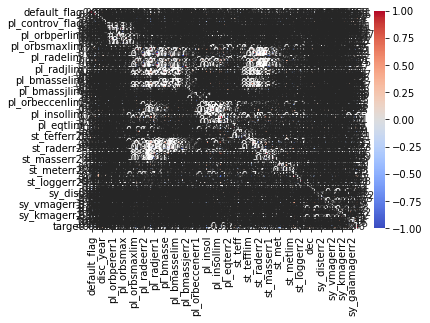

In [351]:
sns.heatmap(finaldf.corr(), annot=True, cmap='coolwarm')

In [352]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1402
Data columns (total 93 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          1637 non-null   object 
 1   hostname         1637 non-null   object 
 2   default_flag     1637 non-null   int64  
 3   sy_snum          1637 non-null   int64  
 4   sy_pnum          1637 non-null   int64  
 5   discoverymethod  1637 non-null   object 
 6   disc_year        1637 non-null   int64  
 7   disc_facility    1637 non-null   object 
 8   soltype          1637 non-null   object 
 9   pl_controv_flag  1637 non-null   int64  
 10  pl_refname       1637 non-null   object 
 11  pl_orbper        1539 non-null   float64
 12  pl_orbpererr1    1476 non-null   float64
 13  pl_orbpererr2    1476 non-null   float64
 14  pl_orbperlim     1539 non-null   float64
 15  pl_orbsmax       979 non-null    float64
 16  pl_orbsmaxerr1   814 non-null    float64
 17  pl_orbsmaxerr2

In [353]:
CategoricalFeatures=[i for i in finaldf.columns if finaldf[i].dtypes=='O']
finaldf[CategoricalFeatures].sample(5)

,pl_name,hostname,discoverymethod,disc_facility,soltype,pl_refname,pl_bmassprov,st_refname,st_spectype,st_metratio,sy_refname,rastr,decstr,rowupdate,pl_pubdate,releasedate
1355,HATS-22 b,HATS-22,Transit,HATSouth,Published Confirmed,<a refstr=KOKORI_ET_AL__2022 href=https://ui.a...,NaN,<a refstr=BENTO_ET_AL__2017 href=https://ui.ad...,K V,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,11h36m02.37s,-29d32m36.11s,2022-01-24 00:00:00,2022-02,2022-01-24 00:00:00
495,GJ 1148 b,GJ 1148,Radial Velocity,W. M. Keck Observatory,Published Confirmed,<a refstr=ROSENTHAL_ET_AL__2021 href=https://u...,Msini,<a refstr=ROSENTHAL_ET_AL__2021 href=https://u...,NaN,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,11h41m43.83s,+42d45m05.71s,2021-09-20 00:00:00,2021-05,2021-09-20 00:00:00
1052,HAT-P-32 b,HAT-P-32,Transit,HATNet,Published Confirmed,<a refstr=KOKORI_ET_AL__2022 href=https://ui.a...,NaN,<a refstr=HARTMAN_ET_AL__2011 href=https://ui....,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,02h04m10.26s,+46d41m16.26s,2022-01-24 00:00:00,2022-02,2022-01-24 00:00:00
180,BD+20 594 b,BD+20 594,Transit,K2,Published Confirmed,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,Mass,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,NaN,[Fe/H],<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h34m36.27s,+20d35m56.47s,2018-04-25 00:00:00,2017-03,2018-04-26 00:00:00
1243,HAT-P-64 b,HAT-P-64,Transit,HATNet,Published Confirmed,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,04h35m53.85s,+02d25m52.58s,2022-10-18 00:00:00,2022-04,2022-10-18 00:00:00


In [354]:
CategoricalFeatures

['pl_name',
 'hostname',
 'discoverymethod',
 'disc_facility',
 'soltype',
 'pl_refname',
 'pl_bmassprov',
 'st_refname',
 'st_spectype',
 'st_metratio',
 'sy_refname',
 'rastr',
 'decstr',
 'rowupdate',
 'pl_pubdate',
 'releasedate']

In [355]:
finaldf.st_metratio.isnull().sum()/len(finaldf)

0.4471594379963348

In [356]:
finaldf['PlanetNumber'] = finaldf['pl_name'].str.extract(r'([a-zA-Z])$', expand=False)

In [357]:
finaldf.sample(5)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_refname,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,sy_refname,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate,target,PlanetNumber
713,GJ 682 c,GJ 682,1,1,2,Radial Velocity,2014,Multiple Observatories,Published Confirmed,0,<a refstr=TUOMI_ET_AL__2014 href=https://ui.ad...,57.320000,4.500000e-01,-4.800000e-01,0.0,0.1760,0.0300,-0.0090,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7000,5.800,-4.600,0.0,0.02737,0.01825,-0.01447,0.0,Msini,0.100,0.190,-0.100,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=TUOMI_ET_AL__2014 href=https://ui.ad...,M3.5 V,3028.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.27,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,17h37m02.65s,264.261025,-44d19m23.71s,-44.323252,5.00671,0.0021,-0.0021,10.940,0.100,-0.100,5.606,0.020,-0.020,9.57025,0.001221,-0.001221,2019-10-04 00:00:00,2014-06,2019-10-10 00:00:00,0,c
297,CoRoT-29 b,CoRoT-29,1,1,1,Transit,2015,CoRoT,Published Confirmed,0,<a refstr=CABRERA_ET_AL__2015 href=https://ui....,2.850570,6.000000e-06,-6.000000e-06,0.0,0.0386,0.0059,-0.0059,0.0,10.088,1.793,-1.793,0.0,0.9,0.16,-0.16,0.0,270.1555,63.566,-63.566,0.0,0.85000,0.20000,-0.20000,0.0,Mass,0.082,0.081,-0.081,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,<a refstr=CABRERA_ET_AL__2015 href=https://ui....,K0 V,5260.0,100.0,-100.0,0.0,0.90,0.12,-0.12,0.0,0.97,0.14,-0.14,0.0,0.20,0.10,-0.10,0.0,[Fe/H],4.30,0.20,-0.20,0.0,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,18h35m36.50s,278.902069,+06d28m46.45s,6.479570,806.50700,44.0270,-39.7600,15.408,0.126,-0.126,13.048,0.031,-0.031,15.23940,0.000532,-0.000532,2015-04-16 00:00:00,2015-07,2015-04-16 00:00:00,0,b
1144,HAT-P-44 b,HAT-P-44,0,1,2,Transit,2014,HATNet,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,4.301190,1.300000e-06,-1.300000e-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,14h12m34.53s,213.143860,+47d00m53.22s,47.014783,347.85000,2.2260,-2.1990,13.225,0.069,-0.069,11.275,0.018,-0.018,12.97290,0.000311,-0.000311,2022-10-18 00:00:00,2022-04,2022-10-18 00:00:00,0,b
988,HAT-P-25 b,HAT-P-25,0,1,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=IVSHINA__AMP__WINN_2022 href=https:/...,3.652815,4.800000e-07,-4.800000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,03h13m44.51s,48.435473,+25d11m50.48s,25.197355,300.38400,4.3000,-4.1820,13.146,0.092,-0.092,10.815,0.018,-0.018,12.84160,0.000244,-0.000244,2022-10-18 00:00:00,2022-04,2022-10-18 00:00:00,0,b
944,HAT-P-20 b,HAT-P-20,0,1,1,Transit,2010,HATNet,Published Confirmed,0,<a refstr=KOKORI_ET_AL__2022 href=https://ui.a...,2.875317,2.400000e-07,-2.400000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [358]:
finaldf.drop(CategoricalFeatures,inplace=True,axis=1)

In [359]:
finaldf.sample(5)

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,target,PlanetNumber
354,0,2,1,2019,0,6.673600,NaN,NaN,0.0,0.0662,0.0013,-0.0013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.58000,0.35000,-0.58000,0.0,0.00812,0.0011,-0.00182,0.0,0.0000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,854.0,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.624382,-72.512665,45.230,1.600,-1.720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,b
278,1,1,2,2018,0,1675.000000,1.900000e+01,-1.700000e+01,0.0,2.9000,0.0700,-0.0700,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5403.11000,317.83000,-317.83000,0.0,17.00000,1.0000,-1.00000,0.0,0.6000,0.030,-0.0300,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.14,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.720425,0.226893,844.061,24.171,-22.883,14.630,0.092,-0.092,12.513,0.029,-0.029,14.4686,0.000412,-0.000412,0,c
1263,0,2,1,2008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,539.35751,8.58141,-8.26358,0.0,1.69700,0.0270,-0.02600,0.0,0.0055,0.007,-0.0033,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36,0.02,-0.02,0.0,0.15,0.08,-0.08,0.0,NaN,NaN,NaN,NaN,292.247190,47.969543,341.079,2.431,-2.397,10.481,0.007,-0.007,9.334,0.018,-0.018,10.3654,0.000393,-0.000393,0,b
1395,0,2,1,2016,0,3.174352,7.000000e-07,-7.000000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5943.0,70.0,-70.0,0.0,1.06,0.04,-0.04,0.0,1.09,0.03,-0.03,0.0,0.06,0.05,-0.05,0.0,4.42,0.03,-0.03,0.0,5.618525,-59.942589,342.140,2.936,-2.888,12.283,0.057,-0.057,10.793,0.019,-0.019,12.0815,0.000203,-0.000203,0,b
1054,0,2,1,2011,0,2.150008,1.400000e-07,-1.400000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.042761,46.687851,289.205,5.355,-5.167,11.439,0.015,-0.015,9.990,0.022,-0.022,11.1335,0.000479,-0.000479,0,b


In [360]:
finaldf.shape

(1637, 78)

In [361]:
finaldf['PlanetNumber'].value_counts()

b    1277
c     183
d      73
e      58
f      37
g       7
Name: PlanetNumber, dtype: int64

In [362]:
finaldf['PlanetNumber'].isnull().sum()

2

In [363]:
finaldf.dropna(subset=['PlanetNumber'], inplace=True)

In [364]:
OE=OrdinalEncoder(categories=[['b','c','d','e','f','g']])
finaldf['PlanetNumber']=OE.fit_transform(finaldf[['PlanetNumber']])
finaldf.sample(5)

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim,ra,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,target,PlanetNumber
237,0,1,1,2010,0,4.035044,2.781000e-05,-2.781000e-05,0.0,NaN,NaN,NaN,NaN,12.533,1.70,-1.70,0.0,1.118,0.152,-0.152,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,546.53,NaN,NaN,0.0,1233.0,NaN,NaN,0.0,0,5945.0,NaN,NaN,0.0,1.14,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.47,NaN,NaN,0.0,102.721143,-5.086456,1148.930,62.120,-56.150,15.005,0.297,-0.297,13.376,0.039,-0.039,14.9147,0.000500,-0.000500,0,0.0
186,0,1,3,2014,0,247.354914,1.391000e-03,-1.391000e-03,0.0,0.6639,NaN,NaN,0.0,2.290,0.10,-0.13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.48,0.09,-0.09,0.0,212.0,NaN,NaN,0.0,0,4859.0,97.0,-97.0,0.0,0.65,0.03,-0.04,0.0,0.64,0.05,-0.02,0.0,-0.520,0.15,-0.15,0.0,4.62,0.05,-0.02,0.0,287.438945,43.832005,384.757,2.684,-2.684,14.530,0.057,-0.057,12.184,0.018,-0.018,14.2858,0.000242,-0.000242,1,2.0
149,0,1,2,2014,0,52.661527,1.360000e-04,-1.360000e-04,0.0,0.2262,NaN,NaN,0.0,1.870,0.11,-0.12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.28,0.26,-0.25,0.0,271.0,NaN,NaN,0.0,0,3984.0,71.0,-86.0,0.0,0.54,0.03,-0.04,0.0,0.56,0.03,-0.04,0.0,-0.220,0.15,-0.15,0.0,4.72,0.03,-0.03,0.0,288.495783,51.081929,293.499,2.279,-2.279,14.654,0.183,-0.183,11.805,0.030,-0.030,14.2400,0.000362,-0.000362,1,1.0
394,1,1,2,2021,0,0.354884,6.300000e-05,-6.300000e-05,0.0,NaN,NaN,NaN,NaN,1.200,0.20,-0.10,0.0,0.107,0.018,-0.009,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4114.0,99.0,-99.0,0.0,0.50,0.04,-0.04,0.0,NaN,NaN,NaN,NaN,0.006,0.12,-0.12,0.0,4.80,0.05,-0.05,0.0,337.513620,-13.610148,451.769,13.976,-13.176,16.590,1.133,-1.133,13.071,0.033,-0.033,15.9752,0.000969,-0.000969,0,1.0
1216,0,3,1,2015,0,2.465295,7.000000e-07,-7.000000e-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7500.0,250.0,-250.0,0.0,1.50,0.05,-0.05,0.0,1.47,0.12,-0.12,0.0,-0.250,0.25,-0.25,0.0,4.25,0.02,-0.02,0.0,274.743418,10.597197,279.860,3.249,-3.176,10.639,0.007,-0.007,9.433,0.024,-0.024,10.4253,0.000579,-0.000579,0,0.0


In [368]:
LCorrFeatures=([col for col in finaldf.columns if abs(finaldf['target'].corr(finaldf[col])) <= 0.17]) 
LCorrFeatures
#41 deleted

['default_flag',
 'sy_snum',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_eqterr1',
 'pl_eqterr2',
 'st_tefferr1',
 'st_tefferr2',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_masserr1',
 'st_masserr2',
 'st_loggerr1',
 'st_loggerr2',
 'sy_dist',
 'sy_disterr1',
 'sy_disterr2',
 'sy_kmagerr1',
 'sy_kmagerr2',
 'sy_gaiamagerr1',
 'sy_gaiamagerr2']

In [369]:
finaldf.drop(columns=LCorrFeatures, inplace=True)

In [376]:

Missing=finaldf.isnull().mean().sort_values(ascending=False).index[:19]

In [393]:
Missing

Index(['pl_insolerr1', 'pl_insolerr2', 'pl_insol', 'pl_insollim', 'pl_eqt',
       'pl_orbeccenerr1', 'pl_eqtlim', 'pl_radjlim', 'pl_radj', 'pl_rade',
       'pl_radelim', 'st_meterr2', 'st_meterr1', 'pl_orbeccen', 'st_met',
       'st_metlim', 'pl_orbsmaxlim', 'st_logglim', 'st_logg'],
      dtype='object')

In [377]:
finaldf.drop(Missing,axis=1,inplace=True)

In [378]:
finaldf.shape

(1635, 18)

<AxesSubplot:>

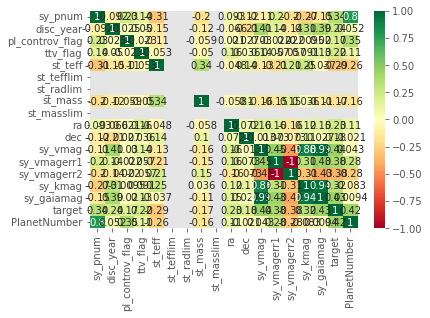

In [383]:
sns.heatmap(finaldf.corr(), annot=True,cmap='RdYlGn')

In [386]:
finaldf['target'].corr(finaldf['st_tefflim'])

nan

In [394]:
st_masslim:Stellar Mass Limit Flag

SyntaxError: invalid syntax (Temp/ipykernel_6860/4046241351.py, line 1)